# Analisi di un catalogo di ammassi di galassie

In questo esercizio viene analizzato un catalogo di ammassi di galassie (`euclid_ammassi.csv`) con caratteristiche simili a quelli che saranno osservati dalla missione Euclid. Il catalogo fornisce la massa (in masse solari) di ogni ammasso per un totale di tre valori di redshift e il volume di universo associato a ciascuno di essi (in ${Mpc}^3/h^3$).

## Parte uno: visualizzazione e analisi dei dati

In [14]:
import pandas as pd
euclid_ammassi = pd.read_csv('euclid_ammassi.csv', index_col = 0)
euclid_ammassi

,mass,z,vol
0,1.060613e+14,0.506,1.479387e+10
1,1.097076e+14,0.506,1.479387e+10
2,1.588869e+14,0.506,1.479387e+10
3,1.336345e+14,0.506,1.479387e+10
4,3.078288e+14,0.506,1.479387e+10
...,...,...,...
362632,1.002043e+14,1.500,9.112247e+10
362633,1.267961e+14,1.500,9.112247e+10
362634,1.273208e+14,1.500,9.112247e+10
362635,1.093178e+14,1.500,9.112247e+10


In [16]:
euclid_ammassi.groupby('z').head()
euclid_ammassi.groupby('z').tail()

,mass,z,vol
168892,1.085008e+14,0.506,1.479387e+10
168893,2.131142e+14,0.506,1.479387e+10
168894,1.401876e+14,0.506,1.479387e+10
168895,3.313962e+14,0.506,1.479387e+10
168896,1.605784e+14,0.506,1.479387e+10
310899,1.195896e+14,1.019,4.783826e+10
310900,1.005500e+14,1.019,4.783826e+10
310901,2.754929e+14,1.019,4.783826e+10
310902,1.367388e+14,1.019,4.783826e+10
310903,1.096074e+14,1.019,4.783826e+10


In [18]:
euclid_ammassi.groupby('z')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
z,,,,,,,,
0.506,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
1.019,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
1.500,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


In [20]:
euclid_ammassi.groupby('vol')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
vol,,,,,,,,
1.479387e+10,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
4.783826e+10,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
9.112247e+10,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


Matplotlib is building the font cache; this may take a moment.


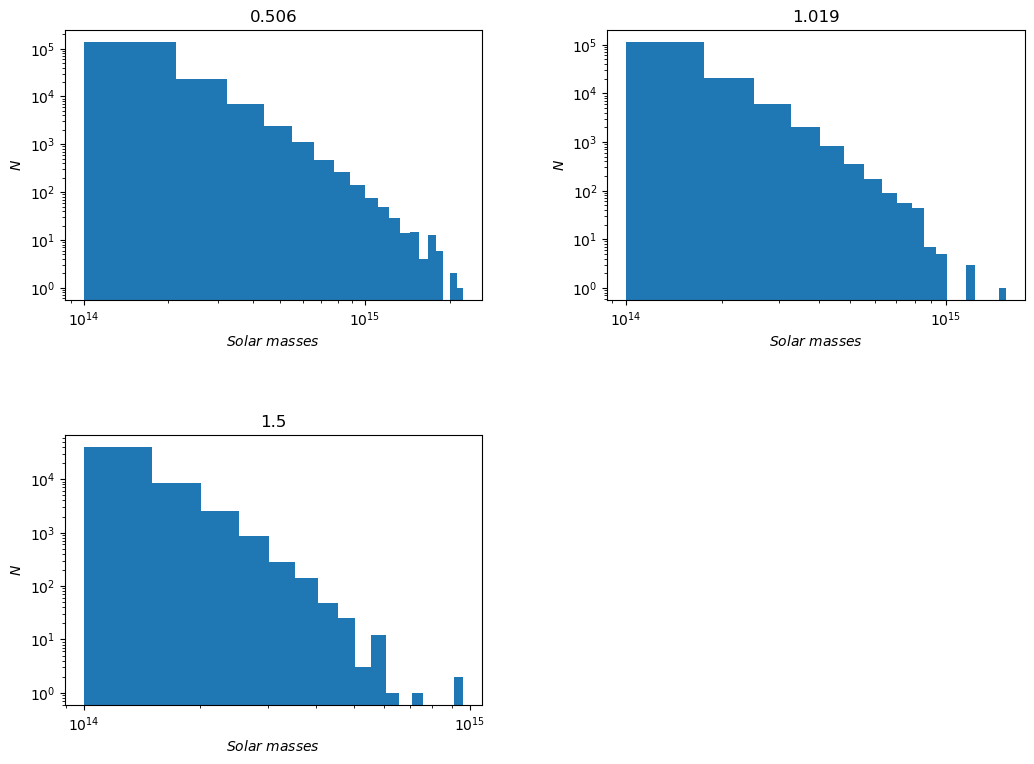

In [25]:
import matplotlib.pyplot as plt
axes = euclid_ammassi.hist(['mass'], 'z', xrot = 0, figsize = (12, 9), bins = 'sturges')
for ax in axes.flatten():
    ax.set(xlabel = '$Solar\ masses$', ylabel = '$N$')
    ax.loglog()
plt.show()

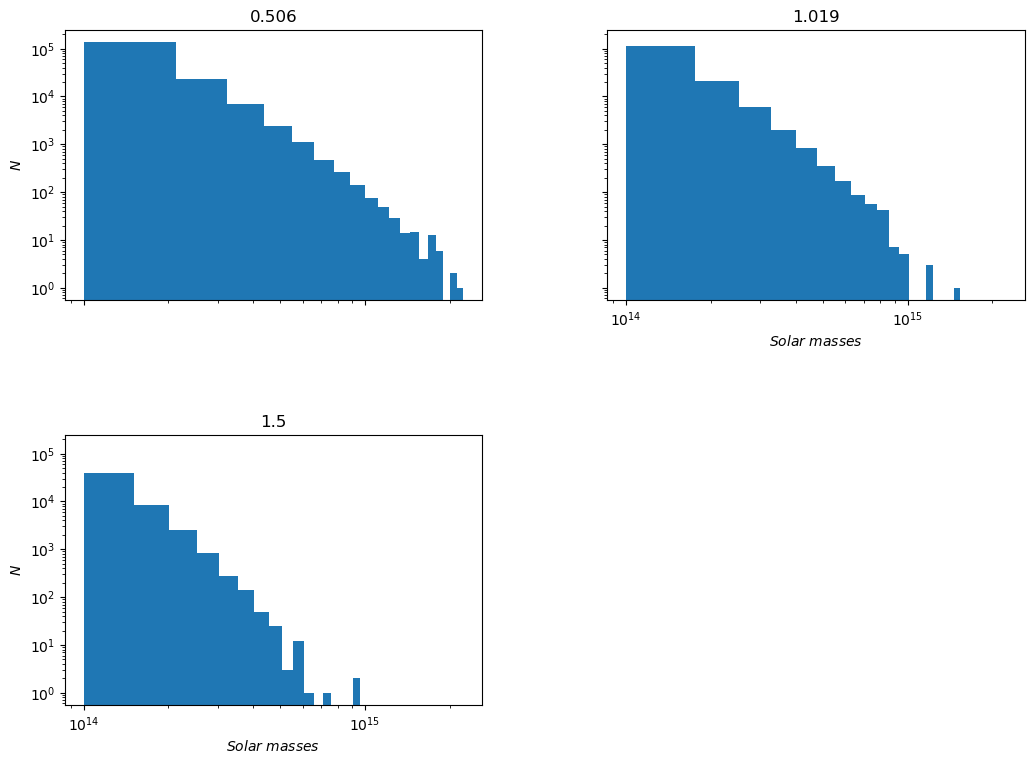

In [27]:
import matplotlib.pyplot as plt
axes = euclid_ammassi.hist(['mass'], 'z', xrot = 0, sharex = True, sharey = True, figsize = (12, 9), bins = 'sturges')
for ax in axes.flatten():
    ax.set(xlabel = '$Solar\ masses$', ylabel = '$N$')
    ax.loglog()
plt.show()

## Parte due: analisi della Halo Mass Function (HMF)

In [79]:
z = [euclid_ammassi['z'].iloc[0], 
     euclid_ammassi['z'].iloc[168897],
     euclid_ammassi['z'].iloc[310904]]
# print(z)

M = [0, 0, 0]
M[0] = np.sort(euclid_ammassi['mass'].iloc[:168897])
M[1] = np.sort(euclid_ammassi['mass'].iloc[168897:310904])
M[2] = np.sort(euclid_ammassi['mass'].iloc[168897:310904])
print(M[0].min())

100000407043369.28


## Parte tre: inferenza bayesiana sui parametri cosmologici

In [63]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function
import numpy as np

def log_prior(theta):
    sigma8, Om0 = theta
    if 0.1 <= sigma8 <= 1.1 and 0.1 <= Om0 <= 1.1:
        return 0.0
    return -np.inf

def log_likelihood(theta, M, z):
    sigma8, Om0 = theta
    params = {'flat': True, 'H0': 67.7, 'Om0': Om0, 
              'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    mfunc = mass_function.massFunction(M, z, mdef = 'vir',
                                      model = 'despali16', q_out = 'dndlnM')
    return np.nansum(mfunc)

def log_prob(theta, M, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, M, z)

In [99]:
ndim = 2

Mi = np.random.uniform(M[0].min(), M[0].max())
zi = z[0]
print(Mi, zi)

# posizione iniziale e numero di walker
p0 = np.array([0.81, 0.31])
nwalkers = 20

1739562937009779.5 0.506


In [101]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, 
                                args = [Mi, zi])